In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearnex import patch_sklearn

patch_sklearn()

from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    PolynomialFeatures,
)
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
file = "./auto-mpg.csv"
mpgDF = pd.read_csv(
    file,
    sep="\s+",
    header=None,
    names=[
        "mpg",
        "cylinders",
        "displacement",
        "horsepower",
        "weight",
        "acceleration",
        "model_year",
        "origin",
        "car_name",
    ],
)
mpgDF.drop(["car_name"], axis=1, inplace=True)
mpgDF


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1
394,44.0,4,97.0,52.00,2130.0,24.6,82,2
395,32.0,4,135.0,84.00,2295.0,11.6,82,1
396,28.0,4,120.0,79.00,2625.0,18.6,82,1


In [3]:
mpgDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [4]:
mpgDF.describe()


,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
for col in mpgDF.columns:
    print(mpgDF[col].unique())


[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]
[8 4 6 3 5]
[307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70.  120.   96.  108.  155.   68.  114.  156.   76.   83.
  90.  231.  262.  134.  119.  171.  115.  10

In [6]:
mpgDF["horsepower"] = pd.to_numeric(mpgDF["horsepower"], errors="coerce")
mpgDF["horsepower"].isna().sum()


6

In [7]:
mpgDF.dropna(inplace=True)
mpgDF.reset_index(drop=True, inplace=True)
mpgDF


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,1
388,44.0,4,97.0,52.0,2130.0,24.6,82,2
389,32.0,4,135.0,84.0,2295.0,11.6,82,1
390,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [8]:
mpgDF["origin"].unique()
mpgDF["origin"].replace({1: "USA", 2: "EU", 3: "JPN"}, inplace=True)
mpgDF["origin"] = mpgDF["origin"].astype("category")


In [9]:
mpgDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    int64   
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        392 non-null    float64 
 5   acceleration  392 non-null    float64 
 6   model_year    392 non-null    int64   
 7   origin        392 non-null    category
dtypes: category(1), float64(5), int64(2)
memory usage: 22.1 KB


In [10]:
mpgDF.corr(numeric_only=True)["mpg"]


mpg             1.000000
cylinders      -0.777618
displacement   -0.805127
horsepower     -0.778427
weight         -0.832244
acceleration    0.423329
model_year      0.580541
Name: mpg, dtype: float64

In [22]:
feature = mpgDF.columns[1:-1]
target = mpgDF.columns[0]
corr = mpgDF.corr(numeric_only=True)["mpg"][1:]


In [29]:
def draw_feature(nrows, ncols, df, target, features, corrs):
    plt.figure(figsize=(ncols * 4, nrows * 4))
    for idx in range(len(features)):
        plt.subplot(nrows, ncols, idx + 1)
        plt.scatter(df[target], df[features[idx]], label=f"{corrs[idx]:.2}")
        plt.legend()
        plt.xlabel(target)
        plt.ylabel(features[idx])
    plt.tight_layout()
    plt.show()


C:\Users\KDP-25\AppData\Local\Temp\ipykernel_9088\3150938401.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(df[target], df[features[idx]], label=f"{corrs[idx]:.2}")


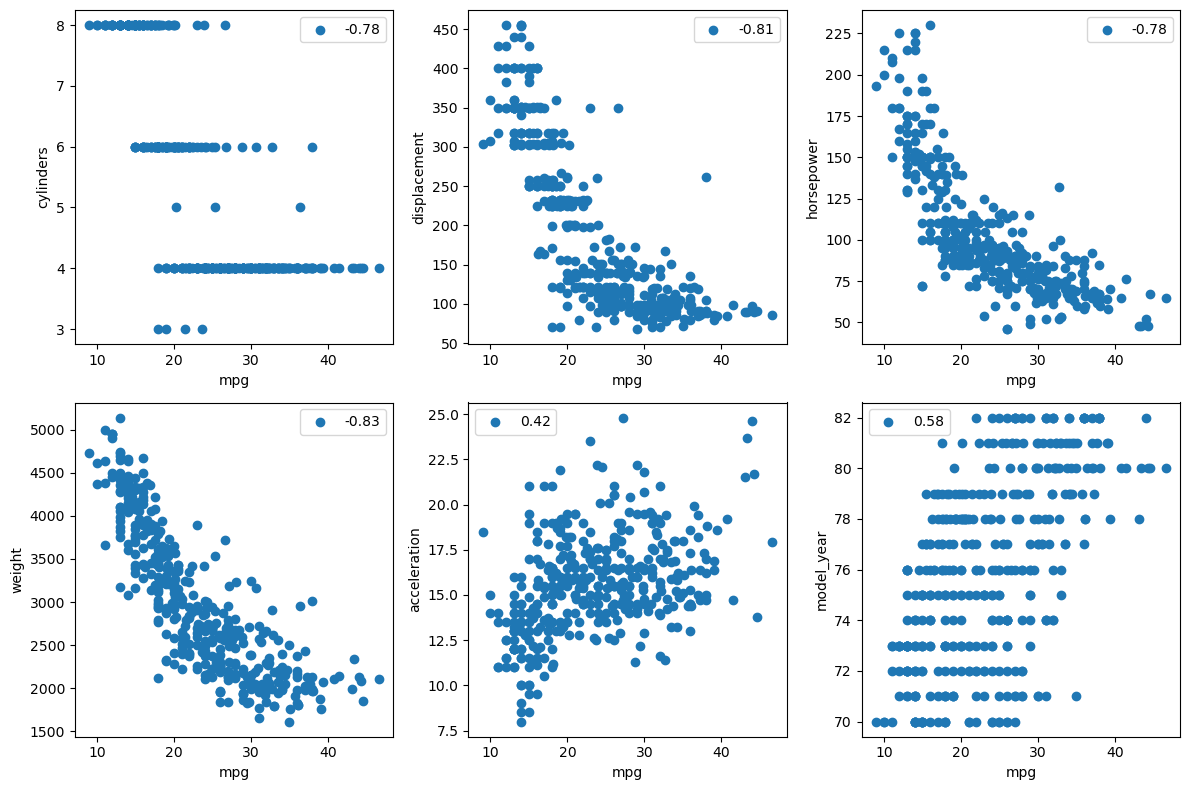

In [30]:
draw_feature(2, 3, mpgDF, target, feature, corr)


In [31]:
mpgDF.columns


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

In [44]:
featureDF = mpgDF[mpgDF.columns[2:5]]
targetDF = mpgDF[mpgDF.columns[0]]


In [45]:
scalers = []
scalers.append(StandardScaler())
scalers.append(MinMaxScaler())
scalers.append(RobustScaler())
poly = PolynomialFeatures()


In [46]:
def bestLR(x_train, x_test, y_train, y_test):
    model = LinearRegression()
    mae, mse, rmse, r2 = np.nan, np.nan, np.nan, np.nan
    model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    diff = abs(test_score - train_score)
    if diff < 0.03 and test_score > train_score:
        y_pred = model.predict(x_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)
        return model, train_score, test_score, diff, mae, mse, rmse, r2
    return None


In [47]:
def bestKR(x_train, x_test, y_train, y_test, k=5, weights="uniform", algorithm="auto"):
    model = KNeighborsRegressor(n_neighbors=k, weights=weights, algorithm=algorithm)
    mae, mse, rmse, r2 = np.nan, np.nan, np.nan, np.nan
    model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    diff = abs(test_score - train_score)
    if diff < 0.03 and test_score > train_score:
        y_pred = model.predict(x_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)
        return model, train_score, test_score, diff, mae, mse, rmse, r2
    return None


In [56]:
def scoring(scoreDict, num=5):
    scoreDF = pd.DataFrame(scoreDict).T
    scoreDF.columns = [
        "random_state",
        "scaler",
        "model",
        "train_score",
        "test_score",
        "diff",
        "mae",
        "mse",
        "rmse",
        "r2",
        "k",
        "weights",
        "algorithm",
    ]
    return scoreDF.sort_values(by=["test_score", "diff"], ascending=[False, True])[:num]


In [57]:
def find_best_model(start=0, num_range=100):
    scoreDict = {}
    i = 0
    for num in range(start, start + num_range):
        x_train, x_test, y_train, y_test = train_test_split(
            featureDF, targetDF, test_size=0.2, random_state=num
        )
        poly.fit(x_train)
        poly_train = poly.transform(x_train)
        poly_test = poly.transform(x_test)
        for scaler in scalers:
            scaler.fit(poly_train)
            scaled_train = scaler.transform(poly_train)
            scaled_test = scaler.transform(poly_test)
            ret = bestLR(scaled_train, scaled_test, y_train, y_test)
            if ret is not None:
                scoreDict[i] = (num, scaler, *ret, 0, "", "")
                i += 1
            for k in range(1, 50 + 1):
                for weights in ["uniform", "distance"]:
                    for algorithm in ["auto", "ball_tree", "kd_tree", "brute"]:
                        ret = bestKR(
                            scaled_train,
                            scaled_test,
                            y_train,
                            y_test,
                            k=k,
                            weights=weights,
                            algorithm=algorithm,
                        )
                        if ret is not None:
                            scoreDict[i] = (num, scaler, *ret, k, weights, algorithm)
                            i += 1
    return scoreDict


In [59]:
bestDF_list = []


In [61]:
scoreDict = find_best_model()
bestDF_list.append(scoring(scoreDict, 10))


In [62]:
scoreDict = find_best_model(100)
bestDF_list.append(scoring(scoreDict, 10))


In [63]:
scoreDict = find_best_model(200)
bestDF_list.append(scoring(scoreDict, 10))


In [64]:
scoreDict = find_best_model(300)
bestDF_list.append(scoring(scoreDict, 10))


In [65]:
scoreDict = find_best_model(400)
bestDF_list.append(scoring(scoreDict, 10))


In [70]:
bestDF_n = pd.concat(bestDF_list)
bestDF = bestDF_n.sort_values(by=["test_score", "diff"], ascending=[False, True])


In [72]:
bestDF[:1]


,random_state,scaler,model,train_score,test_score,diff,mae,mse,rmse,r2,k,weights,algorithm
4454,59,StandardScaler(),KNeighborsRegressor(n_neighbors=3),0.866683,0.869997,0.003314,2.205907,7.977722,2.824486,0.869997,3,uniform,auto
